# Anscombe's Quartet
This is a classic example to demonstrate how summary statistics are now enough to have an overview of a dataset. They are four datasets which share the same summary statistics but when plotted show a completely different picture.

First, we import all the libraries we need.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# from tabulate import tabulate

%matplotlib inline                 # let matplotlib plot inside the notebook

Let's get some information about the dataset, the variables, their values, etc.

In [33]:
df = sns.load_dataset('anscombe')
df.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [34]:
# stats about numerical variables
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [35]:
# stats about nominal variables
df.describe(include=['O'])

,dataset
count,44
unique,4
top,I
freq,11


In [82]:
# group the data according to the dataset and then plot mean, variance
summary = df.groupby('dataset').agg([np.mean, np.var]).transpose()
summary

dataset          I         II       III         IV
x mean    9.000000   9.000000   9.00000   9.000000
  var    11.000000  11.000000  11.00000  11.000000
y mean    7.500909   7.500909   7.50000   7.500909
  var     4.127269   4.127629   4.12262   4.123249

In [39]:
# and correlation
groups = df.groupby('dataset')
corr = [g.corr()['x'][1] for _, g in groups]
corr

[0.81642051634484003,
 0.81623650600024278,
 0.81628673948959807,
 0.81652143688850276]

The four datasets are practically identical from the viewpoint of basic summary statistics, but if we check for instance the median values something start to change and if we plot them we get a completely different picture.

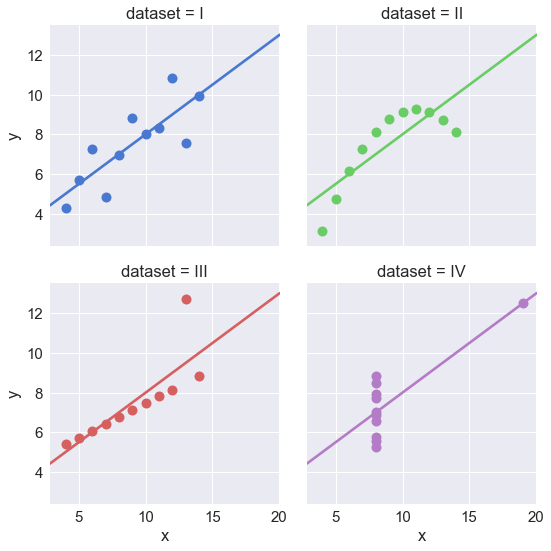

In [81]:
# plt.xticks(np.arange(5,20,5))
sns.set(font_scale=1.5)
g = sns.lmplot(x="x", y="y", col="dataset",
            hue="dataset", data=df,
            col_wrap=2, ci=None, palette="muted", size=4,
            scatter_kws={"s": 100, "alpha": 1})
g.set(xticks=np.arange(5,21,5))
